In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 60.8 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 61.6 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.6 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 71.5 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 73.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 65.0 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 72.8 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 75.5 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 61.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 64.6 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 74.3 MB/s eta 0:00:01
     |██████████████████

## Imports

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

## Load the Dataset

In [5]:
# Define transforms
transforms = transforms.ToTensor()

# Create training set and define training dataloader
train_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transforms)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transforms)
test_loader = DataLoader(test_data, batch_size=100)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


I chose these transforms to convert the images into tensors so that the tensors utilize the GPUs to accelerate the numeric computations.

## Explore the Dataset

In [6]:
def show5(img_loader):
    dataiter = iter(img_loader)
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

6


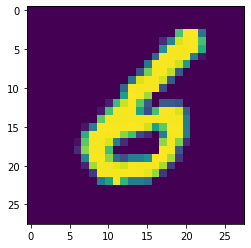

1


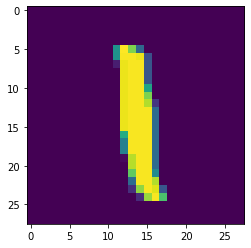

0


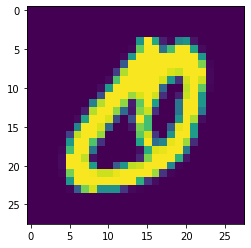

0


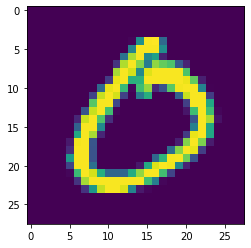

0


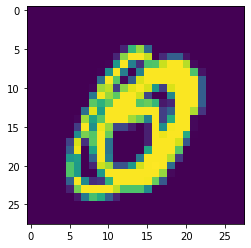

In [7]:
show5(train_loader)

In [8]:
# Explore data
## YOUR CODE HERE ##
print("Number of MNIST train data examples: {}".format(len(train_data)))
print("Number of MNIST test data examples: {}".format(len(test_data)))

Number of MNIST train data examples: 60000
Number of MNIST test data examples: 10000


## Building The Neural Network

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x
    
net = Net()

In [10]:
# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network

In [12]:
num_epochs = 5

# Establish a list for our history
train_loss_history, val_loss_history = [],[]

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Zero out the gradients of the optimizer
        optimizer.zero_grad()

        # Get the outputs of your model and compute your loss
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        # Compute the loss gradient using the backward method and have the optimizer take a step
        loss.backward()
        optimizer.step()

        # Compute the accuracy and print the accuracy and loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    # The validation step is done for you.
    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in test_loader:

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 training accuracy: 89.14% training loss: 0.39424
Epoch 1 validation accuracy: 94.36% validation loss: 0.19655
Epoch 2 training accuracy: 95.20% training loss: 0.16535
Epoch 2 validation accuracy: 95.98% validation loss: 0.12904
Epoch 3 training accuracy: 96.52% training loss: 0.11619
Epoch 3 validation accuracy: 96.57% validation loss: 0.11340
Epoch 4 training accuracy: 97.38% training loss: 0.08680
Epoch 4 validation accuracy: 97.27% validation loss: 0.08785
Epoch 5 training accuracy: 97.95% training loss: 0.06753
Epoch 5 validation accuracy: 97.20% validation loss: 0.08865


Plot the training loss (and validation loss/accuracy, if recorded).

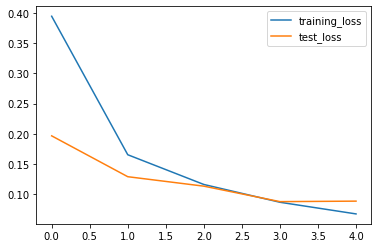

In [16]:
plt.plot(train_loss_history, label='training_loss')
plt.plot(val_loss_history, label='test_loss')
plt.legend()
plt.show()

## Testing The model

In [20]:
def test():
    net.eval()
    test_loss = 0.0
    test_correct = 0.0
    for inputs, labels in test_loader:
        optimizer.zero_grad()
        outputs = Net(inputs)
        loss = criterion(outputs, labels)
        optimizer.backward()
        optimizer.step()
        _, preds = torch.max(outputs, 1) 
        test_loss += loss.item()
        test_correct += (pred==labels).sum().item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

## Improving The Model

Once the model is done training, I'll try tweaking my hyperparameters and training again below to improve the accuracy on the test set.

In [21]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        self.dropout=nn.Dropout(0.2)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x
    
net2 = Net2()

In [22]:
# Choose an optimizer
optimizer = optim.Adam(net2.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

In [23]:
num_epochs = 5

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net2.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Zero out the gradients of the optimizer
        optimizer.zero_grad()

        # Get the outputs of your model and compute your loss
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        
        # Compute the loss gradient using the backward method and have the optimizer take a step
        loss.backward()
        optimizer.step()

        # Compute the accuracy and print the accuracy and loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    # The validation step is done for you.
    val_loss = 0.0
    val_correct = 0
    net2.eval()
    for inputs, labels in test_loader:

        outputs = net2(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 training accuracy: 88.49% training loss: 0.39672
Epoch 1 validation accuracy: 94.25% validation loss: 0.19584
Epoch 2 training accuracy: 95.19% training loss: 0.16584
Epoch 2 validation accuracy: 95.54% validation loss: 0.14449
Epoch 3 training accuracy: 96.67% training loss: 0.11552
Epoch 3 validation accuracy: 96.33% validation loss: 0.11425
Epoch 4 training accuracy: 97.44% training loss: 0.08639
Epoch 4 validation accuracy: 97.08% validation loss: 0.09654
Epoch 5 training accuracy: 97.91% training loss: 0.06861
Epoch 5 validation accuracy: 97.42% validation loss: 0.08306


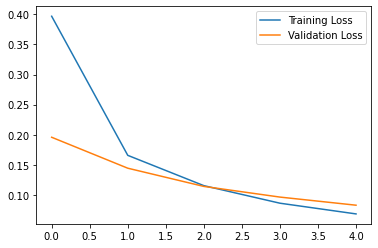

In [24]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

In [26]:
def test2():
    net2.eval()
    test_loss = 0
    test_correct = 0
    for i, data in enumerate(test_loader):
        inputs, labels  = data
            
        optimizer.zero_grad()
        
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

## Saving your model
Using `torch.save`, save your model for future loading.

In [27]:
## YOUR CODE HERE ##
torch.save(Net, "Net.pth")
torch.save(Net2, "Net2.pth")